# Association Rule Learning
- Key Ideas
  - The output is an if...then... type of analysis.
  - Asossitiate rule leraning is a very simple recommender system
- Exmaple:
````
           If      |      Then
    ----------------------------------
    Game fo throne |  Lord of the rings
        Burger     |      Fries
         Jay-Z     |      Kanye
````

- Methodological background

### Support
$Support(Burggers) = \frac{Transactions_With_Burgers}{Total_Transactions}$

- To consider It does not matter if Burgers happen more than once per transaction
- Support indicates the relevance of the item

### Confidence
$Confidence(Mayo|Burggers) = \frac{Transactions_With_Mayo_Burgers}{Total_Buggers_transactions}$

- It does not matter if burgers or MAyor happend more than once per transaction
- Confidence indicates the streght of th relationship


### Support
$lift(Mayo|Burggers) = \frac{Confidence(Mayo|Burggers)}{Support(Burggers)}$

- Lift measusres the likehood of buying mayo and burgers together vs just buying mayo
- Lift bigger than 1 means increased likelihood to buy



# Case of study Briefing - Groceries
- Data customer grocery shopping purchases
  1. We have a file wih almost 10k transactions
  2. We need to find patterns in our data to maximize baskest
  3. Perform association rule leraning
- Step by step
  1. Prepare Datset
  2. Define support
  3. Define confidence
  4. Execute Association Rule Lerning
  5. Visualize Results



# Imports

In [1]:
# !pip install mlxtend

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

# Load Data

In [10]:
dataset = pd.read_csv("./data/groceries.csv")
display(dataset.head())
dataset.shape

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20,Item 21,Item 22
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(9835, 22)

- Really many NaN columns.

# Preparing Transactions

In [4]:
dataset.shape

(9835, 22)

# Transaction list

In [5]:
transactions = []
for i in range (0, 9835):
  transactions.append([str(dataset.values[i,j])
                      for j in range (0,22)])
transactions

[['citrus fruit',
  'semi-finished bread',
  'margarine',
  'ready soups',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['tropical fruit',
  'yogurt',
  'coffee',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['whole milk',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['pip fruit',
  'yogurt',
  'cream cheese ',
  'meat spreads',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product',
  'nan',
  'nan',
  'nan'

# Encode the transactions

In [6]:
te = TransactionEncoder()
te_transactions = te.fit_transform(transactions)
df = pd.DataFrame(te_transactions,
                  columns = te.columns_)
df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


# Association Rule learning

Remove this nan columns

In [7]:
df = df.drop(columns = 'nan')

# ARL

- Key characteristics
  1. Mines frequent items for boolean association rules
  2. Works by finding items that have occured a minimum number of times(support)
  3. And the corresponding itemsets that pass a certain cut-off (confidence)

- Limitations 
  1. slow in processing itemsets
  2. Only allows boolean values

In [8]:
model = apriori(df, min_support= 0.03, use_colnames=True)
results = association_rules(model,
                            metric = 'confidence',
                            min_threshold = 0.3)
results.sort_values(by = 'lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
8,(sausage),(rolls/buns),0.093950,0.183935,0.030605,0.325758,1.771048,0.013324,1.210344
3,(tropical fruit),(other vegetables),0.104931,0.193493,0.035892,0.342054,1.767790,0.015589,1.225796
12,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735
10,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401
5,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929
11,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252
13,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
7,(pip fruit),(whole milk),0.075648,0.255516,0.030097,0.397849,1.557043,0.010767,1.236375
4,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013


# Visualization

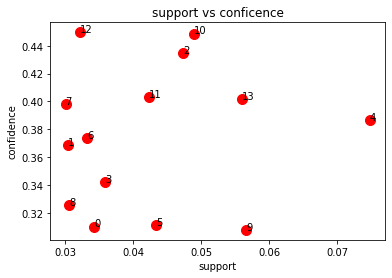

In [9]:
plt.scatter(results['support'],
            results['confidence'],
            s = 100,
            color = 'red')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('support vs conficence')
for i, label in  enumerate(results.index):
  plt.annotate(label, (results['support'][i],
               results['confidence'][i]))
plt.show()